## Do basic EDA for the problem at hand

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(4807, 10)


,user_id,days_last_order,total_orders,total_value,unique_days_visited,total_sessions,avg_duration_btw_login,avg_session_time,avg_page_visits,label
0,151,5,34,152975,130,404,1.39,437.01,27.42,0
1,332,7,3,2959,17,24,4.71,767.08,31.58,1
2,332,14,13,8791,58,101,1.88,274.68,21.73,0
3,443,22,15,7873,94,177,1.74,200.95,20.94,0
4,444,19,13,9875,101,198,1.82,221.55,18.62,0


In [4]:
# Remove any duplicates
data.drop_duplicates().shape

(4807, 10)

In [5]:
data.describe()

,user_id,days_last_order,total_orders,total_value,unique_days_visited,total_sessions,avg_duration_btw_login,avg_session_time,avg_page_visits,label
count,4807.000000,4807.000000,4807.000000,4.807000e+03,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,497862.867277,10.868109,11.877262,2.834057e+04,55.850426,149.307260,3.419216,394.010308,23.949494,0.199293
std,290475.593511,8.254261,17.432478,1.196108e+05,39.528330,180.778974,3.332148,223.189050,12.070923,0.399510
min,151.000000,0.000000,3.000000,2.130000e+02,1.000000,1.000000,0.330000,5.760000,2.000000,0.000000
25%,238742.000000,4.000000,4.000000,3.598500e+03,24.000000,47.000000,1.690000,248.810000,16.110000,0.000000
50%,503565.000000,9.000000,7.000000,7.778000e+03,47.000000,96.000000,2.490000,343.660000,20.930000,0.000000
75%,749073.000000,17.000000,13.000000,1.949200e+04,79.000000,184.000000,3.940000,477.305000,28.380000,0.000000
max,999964.000000,30.000000,636.000000,4.911240e+06,185.000000,3420.000000,84.000000,2267.910000,158.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[data.columns[1:5]])

StandardScaler()

## Examin the boxplot of each variable to understand its characteristics

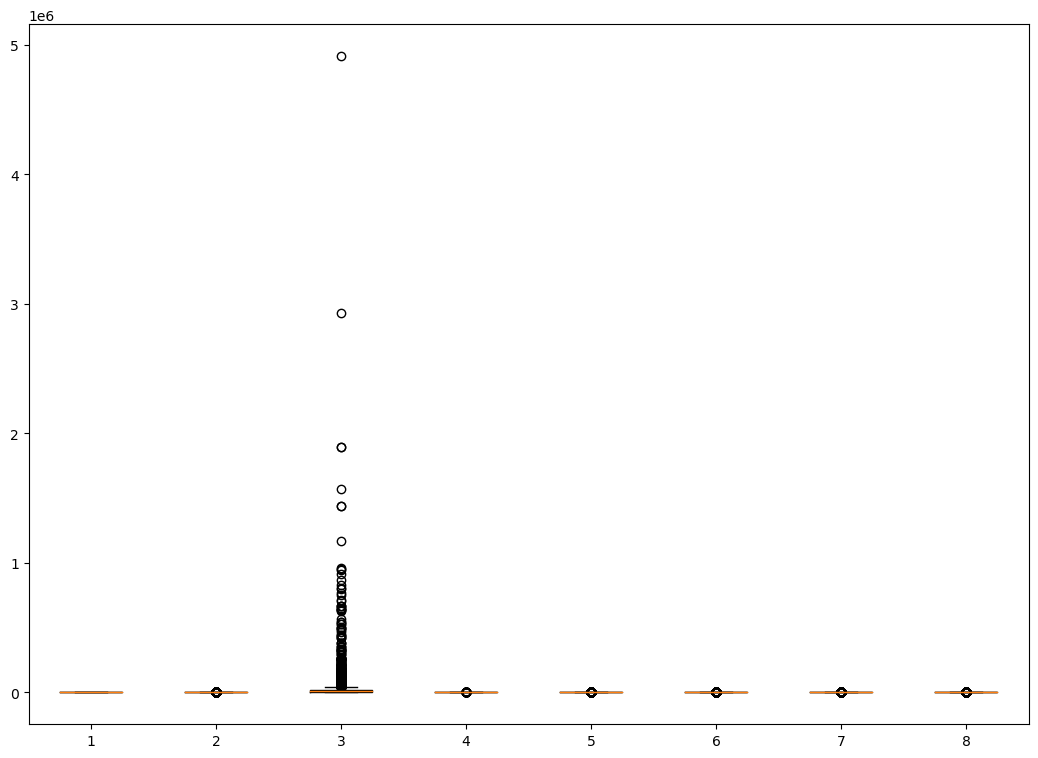

In [7]:
import matplotlib.pyplot as plt
df = [data[x] for x in data.columns[1:-1]]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(df)
# show plot
plt.show()

## Plot distribution funciton of desired variable

In [ ]:
import seaborn as sns
sns.distplot(df[7], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'll')

In [8]:
len(data[data['avg_page_visits']>50]['label'])

176

In [9]:
data[(data['total_orders']<20)&(data['total_value']<40000)&(data['total_sessions']<500)&(data['avg_duration_btw_login']<40)]

,user_id,days_last_order,total_orders,total_value,unique_days_visited,total_sessions,avg_duration_btw_login,avg_session_time,avg_page_visits,label
1,332,7,3,2959,17,24,4.71,767.08,31.58,1
2,332,14,13,8791,58,101,1.88,274.68,21.73,0
3,443,22,15,7873,94,177,1.74,200.95,20.94,0
4,444,19,13,9875,101,198,1.82,221.55,18.62,0
5,720,7,19,14310,20,95,0.95,286.54,17.16,0
...,...,...,...,...,...,...,...,...,...,...
4800,997974,7,15,15822,61,162,2.08,652.09,34.22,0
4801,998525,1,4,3566,13,14,10.38,350.89,28.14,1
4803,999476,12,19,39949,83,141,2.18,135.24,14.07,0
4805,999894,11,4,20870,21,36,8.57,667.09,26.56,1
